# Sentiment Analysis Work Presentation QAnon

1. Want to analyse text. The aim is to prefilter the great masses of text (big data) and make sure the resources are being focused on high value targets.

2. The end game beign the pipeline would apply to multiple formats of text, socials, emails, news, translations etc and eventually multiple languages.

3. Can also be applied for call chaining (relationship analysis) and message chaining (same but for texts) which will increase the value of a targeted investigation at scale. (People have both malicious and non malicious relationships and the use of sentiment analysis would filter those communications and highlight the ones with malicious sentiment (similar values to the target))

4. Take the results of the call chaining and correlate them to the physical locations of people and events.

Now, it's time to have fun!

This kernal aims to:
- Obtain the data
- Clean the data so it can be analysed
- Analyse the data for 
    - Who was tweeting
    - who were they tweeting to
    - what was the sentiment of the tweet
    - filter for hostile/malicious/hate
    - establish the relationships around those people, who, where, what
    - analyse for events, intent and actions
    
- Understand the problem... check each variable and enusre the logic behind the analysis is sound and relevant.
- Univariable study. Initially focus on the dependant variable ('???!!!!????') and understand its impact and relevance.
- Multivariate study. Establish relationships between the dependent variable and independent variables.
- Initial data cleaning. Perform cleaning on the data, deal with missing data, outliers and categorical variables.
- Develop a hypothesis, establish Ho and H1. Determine the alpha. Calculate the z-test. Test assumptions. Check if our data meets the assumptions required by most multivariate techniques. Test against the hypothesis and find if the hypothesis is valid.


## Process

#### 1.Obtain tweets/text with corresponding metadata

#### 2. Analyse texts and tweets for sentiment.

#### 3. Determine which of these tend toward malicious or hostile sentiment.

#### 4. Delve into those with high corralation to hostile/malicious intent and determine other identifiers

#### 5. Identify who those identities are sending malicious/hostile communications

#### 6. Identfy metadata on the highest priority identities

#### 7. Mine the metadata for location and event correlation



## 1. Obtain tweets/text with corresponding metadata


Using https://github.com/twintproject/twint
    
    Grab location data 
    Grab data for parties such as Hammertoss (Russian apt29 use hammertoss that create a daily handle under twitter), QanonAnonymous 
    
Grab some data and save it to a .csv

Do some initial cleaning and exploration of the data

## Preprocessing and DataCleaning


In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string

import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Lets import the datasets that have (hopefully) been uploaded to the python data folder

In [2]:
df  = pd.read_csv('data/QanonAnonymous.csv')


### Data Inspection

First up, have a look at the data and see if it meets expectations...

In [3]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.447000e+18,1.447000e+18,2021-10-10 11:30:59 AUS Eastern Daylight Time,10/10/2021,11:30:59 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.446890e+18,1.446890e+18,2021-10-10 04:21:45 AUS Eastern Daylight Time,10/10/2021,4:21:45 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.445950e+18,1.445950e+18,2021-10-07 14:00:01 AUS Eastern Daylight Time,7/10/2021,2:00:01 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.445220e+18,1.445210e+18,2021-10-05 13:36:15 AUS Eastern Daylight Time,5/10/2021,1:36:15 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'julianfeeld', 'name': 'italien feeld', 'id': '1065087331277787136'}]",NaN,NaN,NaN,NaN
4,1.445210e+18,1.445210e+18,2021-10-05 13:29:08 AUS Eastern Daylight Time,5/10/2021,1:29:08 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
35,1.439720e+18,1.439720e+18,2021-09-20 08:53:41 AUS Eastern Standard Time,20/09/2021,8:53:41 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'QOrigins', 'name': 'The Q Origins Project', 'id': '1301696889297928192'}, {'screen_name': 'jimifletch', 'name': 'Jamie Fletcher', 'id': '273605007'}]",NaN,NaN,NaN,NaN
36,1.439720e+18,1.439720e+18,2021-09-20 08:52:27 AUS Eastern Standard Time,20/09/2021,8:52:27 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'QOrigins', 'name': 'The Q Origins Project', 'id': '1301696889297928192'}]",NaN,NaN,NaN,NaN
37,1.439670e+18,1.439620e+18,2021-09-20 05:04:25 AUS Eastern Standard Time,20/09/2021,5:04:25 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Andrew_Golding', 'name': 'Andrew Golding', 'id': '473103652'}]",NaN,NaN,NaN,NaN
38,1.439620e+18,1.439620e+18,2021-09-20 01:50:02 AUS Eastern Standard Time,20/09/2021,1:50:02 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
39,1.439330e+18,1.439330e+18,2021-09-19 06:55:02 AUS Eastern Standard Time,19/09/2021,6:55:02 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


check for NaN and na in the dataset.

At the moment, just checking to see if there is geolocations for each tweet.

In [5]:
na_df = df[df['geo'].isna()]
na_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.447000e+18,1.447000e+18,2021-10-10 11:30:59 AUS Eastern Daylight Time,10/10/2021,11:30:59 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.446890e+18,1.446890e+18,2021-10-10 04:21:45 AUS Eastern Daylight Time,10/10/2021,4:21:45 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.445950e+18,1.445950e+18,2021-10-07 14:00:01 AUS Eastern Daylight Time,7/10/2021,2:00:01 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.445220e+18,1.445210e+18,2021-10-05 13:36:15 AUS Eastern Daylight Time,5/10/2021,1:36:15 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'julianfeeld', 'name': 'italien feeld', 'id': '1065087331277787136'}]",NaN,NaN,NaN,NaN
4,1.445210e+18,1.445210e+18,2021-10-05 13:29:08 AUS Eastern Daylight Time,5/10/2021,1:29:08 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,1.445200e+18,1.445190e+18,2021-10-05 12:12:09 AUS Eastern Daylight Time,5/10/2021,12:12:09 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1.445190e+18,1.445190e+18,2021-10-05 12:08:23 AUS Eastern Daylight Time,5/10/2021,12:08:23 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FreequentFlyr', 'name': '??Free-quent??Flyer??', 'id': '1242924180'}]",NaN,NaN,NaN,NaN
7,1.445190e+18,1.445190e+18,2021-10-05 12:04:31 AUS Eastern Daylight Time,5/10/2021,12:04:31 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,1.445080e+18,1.445080e+18,2021-10-05 04:49:50 AUS Eastern Daylight Time,5/10/2021,4:49:50 AM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1.444490e+18,1.444390e+18,2021-10-03 13:41:46 AUS Eastern Daylight Time,3/10/2021,1:41:46 PM,1100,1.029500e+18,qanonanonymous,QAA Podcast,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'WarPigDown', 'name': 'pat', 'id': '885692910'}]",NaN,NaN,NaN,NaN


In [6]:
na_df = df[df['geo'].notna()]
na_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


In [7]:
df.shape

(40, 36)

Check the types in the dataset.

NB the date and time are going to have to be munged to be usable.

Items like the conversation_id user_id data type need to be changed. 

In [8]:
df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place              float64
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

Note that there is no label column in the dataset, so the data is unlabeled. 

In [9]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

Okay, I don't think we want all this data right now, lets get rid of the columns that are not interesting....

In [10]:
df_sml = df[['date', 'time', 'geo', 'user_id', 'username','tweet', 'retweets_count', 'likes_count']]
df_sml

,date,time,geo,user_id,username,tweet,retweets_count,likes_count
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4


## DATA EXPLORATION


Other Kernels: Data analysis and feature extraction with Python

'The most difficult thing in life is to know yourself'

This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

The first part of data analysis is to get to know your data. This process is time consuming and possibly the mos tdifficult thing to do (I would argue python is more difficult!!) This step in the process is easy to overlook but fraught if you do!! Dont dive in too soon!


check the distribution of length of the tweets, in terms of words, in the data. 
Remembering your statistics, What does this tell you about the datasets and the analysis you can do on them without risking misinterpreting the data or results? 

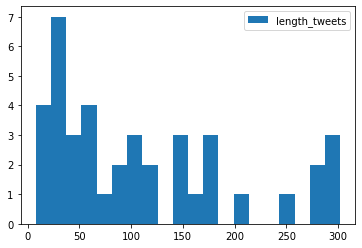

In [11]:
length_df_sml = df_sml['tweet'].str.len()

plt.hist(length_df_sml, bins=20, label="length_tweets")
plt.legend()
plt.show()

tweet is the text.
Most of the tweets are short, there is a definate skew but still a slight binomial distribution.


## DataCleaning

So, to move forward, I am going to start by:
1. Remove columns that don't add anything at this point (I can always go back to them later)
2. Change the data types that need to be changed (time and date, id numbers etc)
3. The Twitter handles are already masked as @user because of privacy. They don't add anything. 
4. Remove punctuation, numbers and special characters 
5. Remove small words
6. From there, split each tweet into individual words (tokens). 
7. Reduce word forms by stemming, and thus reduce the total number of unique words in our data without losing a significant amount of information.


### Remove @user from the tweet

NB This was a step in a previous analysis where the test and train set were combined to make sure that the data is all cleaned in one effort, but in this case, I only have the one set of data... I wanted to keep the code in case I needed to use it...
'''combi = df_sml
combi.shape
combi'''


In [12]:
# Now to go ahead an remove the '@user' tag
# define the remove @user function

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

df_sml

,date,time,geo,user_id,username,tweet,retweets_count,likes_count
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4


In [13]:
# Now, create a new column tidy_tweet for the cleaned and processed tweets. 
# NB. passed “@[\w]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

df_sml['tidy_tweet'] = np.vectorize(remove_pattern)(df_sml['tweet'], "@[\w]*")
df_sml


<ipython-input-13-2599861cc8b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = np.vectorize(remove_pattern)(df_sml['tweet'], "@[\w]*")


,date,time,geo,user_id,username,tweet,retweets_count,likes_count,tidy_tweet
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6"
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393,BREAKING
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36,better bookmark https://t.co/i79GxwxN75
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J"
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0,it does happen on apple podcasts actually! maybe one day for other podcatchers
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends..."
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4,nice


### Remove punctuation, numbers and special characters

In [14]:
# Remove special characters, numbers, punctuation

df_sml['tidy_tweet'] = df_sml['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True )
df_sml

<ipython-input-14-a1131e95e9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = df_sml['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True )


,date,time,geo,user_id,username,tweet,retweets_count,likes_count,tidy_tweet
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152,Global sway of QAnon style a bit like the macarena https t co i E T tad
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760,SCHOOL BOARD MEETINGS EPISODE TONIGHT https t co POIoa vDD
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393,BREAKING
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36,better bookmark https t co i GxwxN
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273,first album tracks by nick sena album art by bakooon aka oliver leach https t co Rtq ByQipu
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71,think if you found this misspelling you can find resolution by signing up and getting an extra episode every week https t co hSFs TIj J
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0,it does happen on apple podcasts actually maybe one day for other podcatchers
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314,the second part of annie s episode is out this is julian and i personally thing it s her best work pure thriller shit
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124,Tonight the thrilling conclusion to our Northern Irish Satanic Panic parter British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic He ends...
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4,nice


## Remove Short Words

In [15]:
# Removing all words with three characters or less

df_sml['tidy_tweet'] = df_sml['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_sml

<ipython-input-15-d6a423005c24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = df_sml['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


,date,time,geo,user_id,username,tweet,retweets_count,likes_count,tidy_tweet
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152,Global sway QAnon style like macarena https
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760,SCHOOL BOARD MEETINGS EPISODE TONIGHT https POIoa
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393,BREAKING
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36,better bookmark https GxwxN
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273,first album tracks nick sena album bakooon oliver leach https ByQipu
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71,think found this misspelling find resolution signing getting extra episode every week https hSFs
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0,does happen apple podcasts actually maybe other podcatchers
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314,second part annie episode this julian personally thing best work pure thriller shit
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124,Tonight thrilling conclusion Northern Irish Satanic Panic parter British Army intelligence turns whistleblower Colin Wallace admitted their role stoking panic ends trial murder lover fianc suppose...
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4,nice


## Further Data Exploration

1. Look at time distribution of tweets
2. Look at statistics around user ids of original tweeters
3. Look at statistics around those who reply
4. Look at geolocation of tweets

In [16]:
df_sml.head(10)

,date,time,geo,user_id,username,tweet,retweets_count,likes_count,tidy_tweet
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152,Global sway QAnon style like macarena https
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760,SCHOOL BOARD MEETINGS EPISODE TONIGHT https POIoa
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393,BREAKING
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36,better bookmark https GxwxN
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273,first album tracks nick sena album bakooon oliver leach https ByQipu
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71,think found this misspelling find resolution signing getting extra episode every week https hSFs
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0,does happen apple podcasts actually maybe other podcatchers
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314,second part annie episode this julian personally thing best work pure thriller shit
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124,Tonight thrilling conclusion Northern Irish Satanic Panic parter British Army intelligence turns whistleblower Colin Wallace admitted their role stoking panic ends trial murder lover fianc suppose...
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4,nice


Need to merge the date and time columns

In [17]:
# Now, create a new column datetime for the merged datetime. 
 #joining both the columns (First name and last name) with the help of Python str.cat() function
df_sml['datetime'] = df_sml['date'].str.cat(df['time'], sep =" ")
df_sml['datetime'] = pd.to_datetime(df_sml['datetime']) 
df_sml = df_sml[['datetime','date', 'time', 'geo', 'user_id', 'username','tweet','tidy_tweet','retweets_count', 'likes_count']]
df_sml.head(10)

<ipython-input-17-ee687add35f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['datetime'] = df_sml['date'].str.cat(df['time'], sep =" ")
<ipython-input-17-ee687add35f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['datetime'] = pd.to_datetime(df_sml['datetime'])


,datetime,date,time,geo,user_id,username,tweet,tidy_tweet,retweets_count,likes_count
0,2021-10-10 11:30:59,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",Global sway QAnon style like macarena https,7,152
1,2021-10-10 04:21:45,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,SCHOOL BOARD MEETINGS EPISODE TONIGHT https POIoa,37,760
2,2021-07-10 14:00:01,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,BREAKING,5,393
3,2021-05-10 13:36:15,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,better bookmark https GxwxN,1,36
4,2021-05-10 13:29:08,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,first album tracks nick sena album bakooon oliver leach https ByQipu,15,273
5,2021-05-10 12:12:09,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",think found this misspelling find resolution signing getting extra episode every week https hSFs,2,71
6,2021-05-10 12:08:23,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,does happen apple podcasts actually maybe other podcatchers,0,0
7,2021-05-10 12:04:31,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,second part annie episode this julian personally thing best work pure thriller shit,4,314
8,2021-05-10 04:49:50,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",Tonight thrilling conclusion Northern Irish Satanic Panic parter British Army intelligence turns whistleblower Colin Wallace admitted their role stoking panic ends trial murder lover fianc suppose...,12,124
9,2021-03-10 13:41:46,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,nice,0,4


In [18]:
df_sml.dtypes

datetime          datetime64[ns]
date                      object
time                      object
geo                      float64
user_id                  float64
username                  object
tweet                     object
tidy_tweet                object
retweets_count             int64
likes_count                int64
dtype: object

## Visualisation and understanding the story behind the tweets

This is part of the data exploration and visualisation. Some fo the quesitons we may want to ask include things like: 
    1. What words are most common
    2. What words are most common for negative and positive tweets, respectively?
    3. How many hashtags in a tweet?
    4. What are the trends in the data?
    5. Which of the trends are associated with sentiments, positive and negative? Are they compatible with the sentiments?

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the tweets combined.

In [19]:
def gen_freq(tweet):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in tweet.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df_sml.tweet.str)

the                31
of                 20
to                 14
and                14
a                  11
                   ..
commenters          1
signing             1
particularities     1
ago,                1
Either              1
Length: 460, dtype: int64

In [20]:
# Continue to clean the text by removing any remaining characters and converting to lower case

import re

def clean_text(tidy_tweet):
    #Remove RT
    tidy_tweet = re.sub(r'RT', '', tidy_tweet)
    
    #Fix &
    tidy_tweet = re.sub(r'&amp;', '&', tidy_tweet)
    
    #Remove punctuations
    tidy_tweet = re.sub(r'[?!.;:,#@-]', '', tidy_tweet)

    #Convert to lowercase to maintain consistency
    tidy_tweet = tidy_tweet.lower()
    return tidy_tweet

In [21]:
df_sml.head(10)

,datetime,date,time,geo,user_id,username,tweet,tidy_tweet,retweets_count,likes_count
0,2021-10-10 11:30:59,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",Global sway QAnon style like macarena https,7,152
1,2021-10-10 04:21:45,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,SCHOOL BOARD MEETINGS EPISODE TONIGHT https POIoa,37,760
2,2021-07-10 14:00:01,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,BREAKING,5,393
3,2021-05-10 13:36:15,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,better bookmark https GxwxN,1,36
4,2021-05-10 13:29:08,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,first album tracks nick sena album bakooon oliver leach https ByQipu,15,273
5,2021-05-10 12:12:09,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",think found this misspelling find resolution signing getting extra episode every week https hSFs,2,71
6,2021-05-10 12:08:23,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,does happen apple podcasts actually maybe other podcatchers,0,0
7,2021-05-10 12:04:31,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,second part annie episode this julian personally thing best work pure thriller shit,4,314
8,2021-05-10 04:49:50,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",Tonight thrilling conclusion Northern Irish Satanic Panic parter British Army intelligence turns whistleblower Colin Wallace admitted their role stoking panic ends trial murder lover fianc suppose...,12,124
9,2021-03-10 13:41:46,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,nice,0,4


#### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by- 


In [22]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'these', 'below', "she'd", 'shall', 'ever', "it's", 'own', "shan't", 'she', 'until', "he'll", "doesn't", 'if', 'was', 'am', 'else', 'not', "i'll", 'more', "haven't", "you'd", 'r', 'where', 'each', 'its', 'cannot', 'having', 'has', 'have', 'against', "we're", 'through', "he'd", 'could', 'ours', 'them', 'get', 'so', "you're", 'the', 'it', "wasn't", "isn't", 'our', 'a', "they're", "they've", 'nor', 'you', 'myself', 'themselves', 'while', 'k', 'further', 'during', "didn't", 'only', 'this', 'also', 'is', 'for', "mustn't", "you've", 'which', "who's", 'under', 'out', "here's", 'off', 'does', 'than', 'with', "we'll", 'theirs', 'hence', 'of', 'other', 'their', 'me', 'should', 'to', 'then', 'yourselves', 'com', 'since', 'what', 'as', "we've", 'when', 'few', "they'll", 'before', 'however', 'such', 'herself', 'between', "hadn't", 'too', 'hers', 'they', 'into', 'your', "won't", 'from', 'he', "shouldn't", 'those', 'here', 'i', "she'll", 'http', 'no', "where's", 'after', 'down', "hasn't", 'but', 'ju

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. 

We'll call the previous functions of clean_text() and gen_freq() to perform cleaning and frequency computation operation respectively and drop the words present in STOPWORDS from the word_freq dictionary.

### Wordcloud plot

In [23]:
all_words = ' '.join([text for text in df_sml['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

Thats great, but there are a whole lot of words that I'm really not  interested in at this time. So, using the stop words, remove these for a more meaningful index.

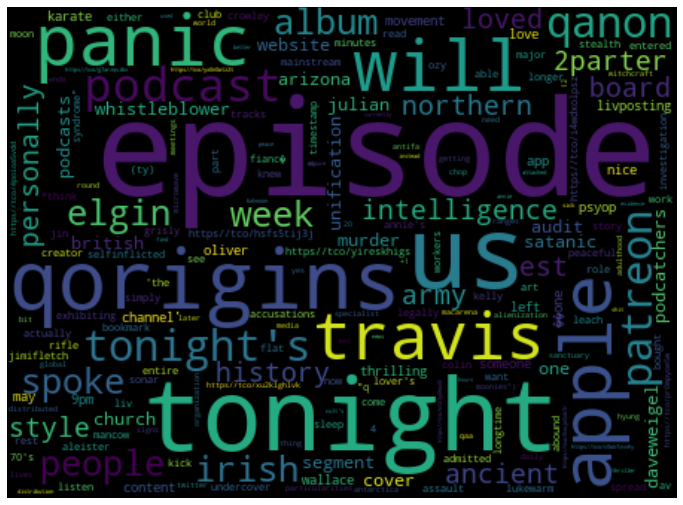

In [95]:
tweet = df_sml.tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(tweet.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Words in non-racist or non sexist tweets

In [179]:
normal_words =' '.join([text for text in df_sml['tidy_tweet'][df_sml['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'label'

Racist and Sexist tweets

In [ ]:
negative_words = ' '.join([text for text in df_sml['tidy_tweet'][df_sml['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### How hashtags impact tweet sentiment

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['tweet'][df['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Non Racist / Sexitst tweets

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


Racist / Sexist Tweets

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 25)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Text Normalisation

## Tokenisation

In [47]:
tokenized_tweet = df_sml['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                 [Global, sway, QAnon, style, like, macarena, https]
1                           [SCHOOL, BOARD, MEETINGS, EPISODE, TONIGHT, https, POIoa]
2                                                                          [BREAKING]
3                                                    [better, bookmark, https, GxwxN]
4    [first, album, tracks, nick, sena, album, bakooon, oliver, leach, https, ByQipu]
Name: tidy_tweet, dtype: object

## Stemming

In [48]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                              [global, sway, qanon, style, like, macarena, http]
1                             [school, board, meet, episod, tonight, http, poioa]
2                                                                         [break]
3                                                 [better, bookmark, http, gxwxn]
4    [first, album, track, nick, sena, album, bakooon, oliv, leach, http, byqipu]
Name: tidy_tweet, dtype: object

Now, to stick them back together...

In [49]:
stemmed_tweet = tokenized_tweet.apply(lambda x: ' '.join(x))
stemmed_tweet.head()
df_sml['stemmed_tweet'] = stemmed_tweet
df_sml

<ipython-input-49-a6d86cc4477c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['stemmed_tweet'] = stemmed_tweet


,date,time,geo,user_id,username,tweet,retweets_count,likes_count,tidy_tweet,stemmed_tweet
0,10/10/2021,11:30:59 AM,NaN,1.029500e+18,qanonanonymous,"Global sway of QAnon style, a bit like the macarena https://t.co/i2E1T2tad6",7,152,Global sway QAnon style like macarena https,global sway qanon style like macarena http
1,10/10/2021,4:21:45 AM,NaN,1.029500e+18,qanonanonymous,SCHOOL BOARD MEETINGS EPISODE TONIGHT https://t.co/4POIoa5vDD,37,760,SCHOOL BOARD MEETINGS EPISODE TONIGHT https POIoa,school board meet episod tonight http poioa
2,7/10/2021,2:00:01 PM,NaN,1.029500e+18,qanonanonymous,BREAKING,5,393,BREAKING,break
3,5/10/2021,1:36:15 PM,NaN,1.029500e+18,qanonanonymous,@julianfeeld better bookmark https://t.co/i79GxwxN75,1,36,better bookmark https GxwxN,better bookmark http gxwxn
4,5/10/2021,1:29:08 PM,NaN,1.029500e+18,qanonanonymous,first album. 12 tracks by nick sena. album art by bakooon aka oliver leach https://t.co/Rtq6ByQipu,15,273,first album tracks nick sena album bakooon oliver leach https ByQipu,first album track nick sena album bakooon oliv leach http byqipu
5,5/10/2021,12:12:09 PM,NaN,1.029500e+18,qanonanonymous,"*think. if you found this misspelling, you can find resolution by signing up and getting an extra episode every week: https://t.co/hSFs5TIj3J",2,71,think found this misspelling find resolution signing getting extra episode every week https hSFs,think found thi misspel find resolut sign get extra episod everi week http hsf
6,5/10/2021,12:08:23 PM,NaN,1.029500e+18,qanonanonymous,@FreequentFlyr it does happen on apple podcasts actually! maybe one day for other podcatchers,0,0,does happen apple podcasts actually maybe other podcatchers,doe happen appl podcast actual mayb other podcatch
7,5/10/2021,12:04:31 PM,NaN,1.029500e+18,qanonanonymous,the second part of annie's episode is out. this is julian and i personally thing it's her best work ��pure thriller shit,4,314,second part annie episode this julian personally thing best work pure thriller shit,second part anni episod thi julian person thing best work pure thriller shit
8,5/10/2021,4:49:50 AM,NaN,1.029500e+18,qanonanonymous,"Tonight, the thrilling conclusion to our Northern Irish Satanic Panic 2-parter: British Army intelligence turns on whistleblower Colin Wallace who admitted their role in stoking the panic. He ends...",12,124,Tonight thrilling conclusion Northern Irish Satanic Panic parter British Army intelligence turns whistleblower Colin Wallace admitted their role stoking panic ends trial murder lover fianc suppose...,tonight thrill conclus northern irish satan panic parter british armi intellig turn whistleblow colin wallac admit their role stoke panic end trial murder lover fianc supposedli with karat chop ht...
9,3/10/2021,1:41:46 PM,NaN,1.029500e+18,qanonanonymous,@WarPigDown nice,0,4,nice,nice


## Extracting Features

In [ ]:
# !pip install gensim

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

## Bag of Words

Bag of Wrods is a bit like 'one hot encoding' in that it represents words with numbers. If a corpus is the collection of tweets (C=corpus D=documents (or in this case tweets), and the number of tokens taken from the corpus is N, then the size of the matrix resulting from the list of tokens of length N is given by DXN. Each row in the matrix M has the frequency of the tokens in document D(i).

For example: Suppose we have only 2 tweets:

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The list of the unique tokens in the corpus C = [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –

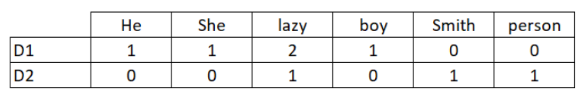

The columns of which can now be used for a classification model. 
The CountVectorizer function can be used here to  make Bag-of-Words features. 
Set the parameter max_features = 1000 to select the top 1000 terms ordered by term frequency across the corpus.

In [ ]:
import sklearn

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_sml['tidy_tweet'])

bow

## TF-IDF Features

This method is based on the frequency method, but differs from the bag of words method by accounting for, not only the frequency of the word in a tweet, but also the frequency of the words overall (in the whole corpus). 
If a word occurs frequently, it is 'penalised' with a lower weighting than words that appear often in a number of the tweets but rarely in the overall corpus.

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_sml['tidy_tweet'])

## Word Embeddings

### 1. Word2Vec Embeddings

In [181]:
tokenized_tweet = df_sml['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df_sml['tidy_tweet']), epochs=20)

(4777799, 5756960)

In [182]:
model_w2v.wv.most_similar(positive="dinner")

[('crockpot', 0.6567623019218445),
 ('Screaming', 0.5829009413719177),
 ('Flies', 0.5817199349403381),
 ('preparing', 0.5789965987205505),
 ('chop', 0.5788799524307251),
 ('Lancaster', 0.5783094167709351),
 ('Connery', 0.5771684646606445),
 ('Mummy', 0.5768377184867859),
 ('faux', 0.5748926997184753),
 ('belly', 0.5718146562576294)]

In [183]:
model_w2v.wv.most_similar(positive="trump")

[('republicans', 0.9321557879447937),
 ('americans', 0.8705238699913025),
 ('ferrari', 0.836243748664856),
 ('tale', 0.832535445690155),
 ('Sikhs', 0.8212410807609558),
 ('Educating', 0.8043864369392395),
 ('Afghans', 0.7921674847602844),
 ('vinegar', 0.7912289500236511),
 ('piglet', 0.7888529896736145),
 ('sharia', 0.7885075807571411)]

In [184]:
model_w2v.wv['food']

array([ 0.81223357, -0.6818026 ,  0.76658446,  0.40457347, -0.12335154,
        0.3050029 ,  0.0740547 , -0.32870746, -0.00458604, -0.533954  ,
        0.01340015, -0.5625243 , -0.728029  ,  0.11237971, -0.23711312,
       -0.4039131 , -0.2844154 , -0.1549337 , -0.19791003, -0.65776354,
        0.09171406,  0.1843891 , -0.759006  ,  0.11626886, -0.39531916,
        0.18852448,  0.1786122 , -0.21258554, -0.10633849,  0.22512233,
        0.30647686,  0.66633177, -0.40359622, -0.04794641, -0.7473024 ,
        0.25442684,  0.37290138,  0.83974165, -0.12555727,  0.10339295,
        0.41613388, -0.42344043,  0.03941932,  0.25024748,  0.06177113,
        0.25765622,  0.7885342 ,  0.5962546 ,  0.04740798, -0.4007539 ,
       -0.06630921,  0.24596517, -0.21159501,  0.0128834 , -0.15000688,
        0.4882617 , -0.601053  ,  0.17066862,  1.0314339 , -1.1208959 ,
       -0.12948182, -0.19668895,  0.7396328 ,  0.36285025, -0.49562868,
       -0.14971031, -0.26179746,  0.05977096,  0.16970254, -0.06

In [185]:
len(model_w2v.wv['food']) #The length of the vector is 200

200

## Preparing Vectors for Tweets

convert processed text to numeric feature vectors in order to be able to feed it to computers for analysis.

In [186]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [187]:
# Preparing word2vec feature set...

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(40405, 200)

## 2. Doc2Vec Embedding

In [188]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.



In [189]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets


Check to see if working

In [190]:
labeled_tweets[:5]


[TaggedDocument(words=['Yeah'], tags=['tweet_0']),
 TaggedDocument(words=['Indeed', 'ever', 'sleep'], tags=['tweet_1']),
 TaggedDocument(words=['October', 'already', 'Time', 'flies'], tags=['tweet_2']),
 TaggedDocument(words=['Right', 'throat', 'then', 'brainbuster', 'through', 'table'], tags=['tweet_3']),
 TaggedDocument(words=['problem', 'many', 'countries', 'Pretty', 'much', 'every', 'developed', 'country', 'market', 'economy', 'owning', 'property', 'something', 'that', 'reach', 'working', 'class', 'baffles', 'that', 'this', 'world', 'opulence', 'something', 'basic', 'housing', 'hard', 'come'], tags=['tweet_4'])]

# Model Building Sentiment Analysis

The Pre modelling stages are complete, these have prepared our data so that it is the correct form and shape.
The next step is to build the predictive models, using our prepared dataet and the two feature set Bag of Wrods and TF-IDF.
Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.

In order to predict the probability of an occurance of an event we will use logistic regression for the models. 
This will fit the data to a logit function. 

The Logistic Regression equation is:


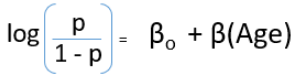 
    
    
   
    
    
    
    

## Training a Doc 2 Vec model

Now lets call to train the model. This may take some time to run, a number will show int he ln[] box on the left when its done.

In [191]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 40405/40405 [00:00<00:00, 3674722.52it/s]


In [192]:
model_d2v.train(labeled_tweets, total_examples= len(df_sml['tidy_tweet']), epochs=15)

### Preparing doc2vec Feature Set

In [193]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(df_sml)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(40405, 200)

## Using Bag of Words Features

Building a model using logistic regression

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

NameError: name 'train' is not defined

This step trained the logistic regression model on the features from the bag of words.
The Output number listed below the window is the F1-score, a score of 0.501 for the validation set. 

Now we will use this model to predict for the test data.

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

## Building the model using the TF-IDF features

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

The validation score is 0.5009. So, by using the TF-IDF features, the validation score has improved very slightly.

## End Notes:

This workbook steps through a sentiment analysis problem using a dataset of tweets that have already been collected. 
The first steps were data preprocessing and exploration.
Then features were extracted from the cleaned text using Bag-of-Words and TF-IDF. 
To finish we steped through building a couple of models using both the feature sets to classify the tweets.

## References and Sources

Hate speech detection: Challenges and solutions
Sean MacAvaney ,Hao-Ren Yao,Eugene Yang,Katina Russell,Nazli Goharian,Ophir Frieder
Published: August 20, 2019
https://doi.org/10.1371/journal.pone.0221152

@inproceedings{gibert2018hate,
    title = "{Hate Speech Dataset from a White Supremacy Forum}",
    author = "de Gibert, Ona  and
      Perez, Naiara  and
      Garc{\'\i}a-Pablos, Aitor  and
      Cuadros, Montse",
    booktitle = "Proceedings of the 2nd Workshop on Abusive Language Online ({ALW}2)",
    month = oct,
    year = "2018",
    address = "Brussels, Belgium",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/W18-5102",
    doi = "10.18653/v1/W18-5102",
    pages = "11--20",
}